In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

from pathlib import Path
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

from src.target import TargetEncoder
from src.woe import WeigthOfEvidenceEncoder

#from category_encoders import TargetEncoder
#from mlencoders.target_encoder import TargetEncoder
#from mlencoders.weight_of_evidence_encoder import WeightOfEvidenceEncoder

In [3]:
plt.style.use('ggplot')
%load_ext autoreload
%autoreload 2

In [2]:
#from sklearn.datasets import load_boston
#from mlencoders.target_encoder import TargetEncoder
#import pandas as pd

#enc = TargetEncoder(cols=cat_names)
#X_encoded = enc.fit_transform(X, pd.Categorical(credit['status']))

In [4]:
path = Path('..', 'data', 'raw')
credit = pd.read_csv(path / 'credit_data.csv').rename(columns=lambda c: c.lower())

In [5]:
dep_var = 'status'
cat_names = ['home', 'marital', 'records', 'job']
cnt_names = ['seniority', 'time', 'age', 'expenses', 'income', 'debt', 'amount', 'price']

In [6]:
credit[cat_names] = credit[cat_names].astype('category')

In [7]:
n = len(credit)
valid_idx = np.random.choice(range(n), np.ceil(n * 0.2).astype('int'))

In [132]:
ohe_pipe = Pipeline([
    ('ohe', OneHotEncoder())
])

target_pipe = Pipeline([
    ('target', TargetEncoder(cols=['home', 'marital', 'records', 'job']))
])

woe_pipe = Pipeline([
    ('woe', TargetEncoder(cols=['home', 'marital', 'records', 'job']))
])

cnt_pipe = Pipeline([
    ('impute', KNNImputer()),
    ('scale', StandardScaler())
])

col_transform = ColumnTransformer(transformers=[
    ('cat', woe_pipe, cat_names),
    ('cnt', cnt_pipe, cnt_names)
])

In [133]:
y=credit['status']
X=credit.drop(columns='status')

In [134]:
rf_pipe = Pipeline([('preproc', col_transform), ('model', RandomForestClassifier())])
rf_pipr = rf_pipe.fit(X, y)

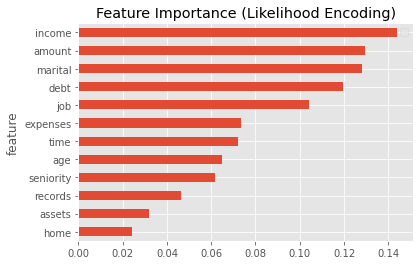

In [136]:
feat_imp = zip(X.columns, rf_pipe._final_estimator.feature_importances_)
feat_imp = (pd.DataFrame(feat_imp, columns=['feature', 'imp'])
    .set_index('feature')
    .sort_values('imp'))
feat_imp.plot(kind='barh', title='Feature Importance (Likelihood Encoding)')
plt.legend('');

In [144]:
WeigthOfEvidenceEncoder(cols=['home', 'marital', 'records', 'job']).fit_transform(X, y)

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,9,-0.526206,60,30,0.131179,0.304982,-0.206815,73,129.0,0.0,0.0,800,846
1,17,-0.526206,60,58,-0.010050,0.304982,0.407672,48,131.0,0.0,0.0,1000,1658
2,10,0.545375,36,46,0.131179,-1.157628,-0.206815,90,200.0,3000.0,0.0,2000,2985
3,0,-0.526206,60,24,-0.254393,0.304982,0.407672,63,182.0,2500.0,0.0,900,1325
4,0,-0.526206,36,26,-0.254393,0.304982,0.407672,46,107.0,0.0,0.0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4449,1,-0.526206,60,39,0.131179,0.304982,0.407672,69,92.0,0.0,0.0,900,1020
4450,22,0.545375,60,46,0.131179,0.304982,0.407672,60,75.0,3000.0,600.0,950,1263
4451,0,0.545375,24,37,0.131179,0.304982,-1.340434,60,90.0,3500.0,0.0,500,963
4452,0,-0.526206,48,23,-0.254393,0.304982,-0.206815,49,140.0,0.0,0.0,550,550


In [143]:
TargetEncoder(cols=['home', 'marital', 'records', 'job']).fit_transform(X, y)

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,9,-0.410621,60,30,-1.068082,-1.241794,-0.730131,73,129.0,0.0,0.0,800,846
1,17,-0.410621,60,58,-0.928251,-1.241794,-1.344421,48,131.0,0.0,0.0,1000,1658
2,10,-1.482190,36,46,-1.068082,0.220816,-0.730131,90,200.0,3000.0,0.0,2000,2985
3,0,-0.410621,60,24,-0.682485,-1.241794,-1.344421,63,182.0,2500.0,0.0,900,1325
4,0,-0.410621,36,26,-0.682485,-1.241794,-1.344421,46,107.0,0.0,0.0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4449,1,-0.410621,60,39,-1.068082,-1.241794,-1.344421,69,92.0,0.0,0.0,900,1020
4450,22,-1.482190,60,46,-1.068082,-1.241794,-1.344421,60,75.0,3000.0,600.0,950,1263
4451,0,-1.482190,24,37,-1.068082,-1.241794,0.403547,60,90.0,3500.0,0.0,500,963
4452,0,-0.410621,48,23,-0.682485,-1.241794,-0.730131,49,140.0,0.0,0.0,550,550
